# Using NLP Techniques to Predict Song Skips on Spotify based on Sequential User and Acoustic Data

# Import library, Load data and View data

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from scipy import stats

In [4]:
pd.set_option("display.max_columns",None)

In [5]:
#pip install mlxtend

In [6]:
#from mlxtend.preprocessing import minmax_scaling

In [7]:
import seaborn as sns

In [8]:
import matplotlib.pyplot as plt

In [9]:
import datetime

In [10]:
sp_data = pd.read_csv("C:/Users/Aiswarya/SpotifyPredict/Training.csv")

In [11]:
sp_track = pd.read_csv("C:/Users/Aiswarya/SpotifyPredict/Track features.csv")

In [12]:
df = pd.merge(sp_data, sp_track, left_on='track_id_clean', right_on='track_id')

In [13]:
np.random.seed(0)

In [14]:
df.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
1,0_00079a23-1600-486a-91bd-5208be0c745a,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,True,False,0,0,1,1,0,0,False,17,2018-07-15,True,editorial_playlist,fwdbtn,endplay,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
2,0_012b0fb4-0cc3-429f-9a78-cc6e622153fb,6,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,1,1,0,0,False,21,2018-07-14,True,user_collection,trackdone,trackdone,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
3,0_013cc010-c476-4ad2-8972-73449e0b2ef4,9,13,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,1,0,0,0,0,False,18,2018-07-15,True,editorial_playlist,fwdbtn,trackdone,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
4,0_01a5f0dc-9938-48c9-92f1-c7e51f34d290,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,True,False,0,0,1,1,0,0,True,19,2018-07-14,False,editorial_playlist,trackdone,fwdbtn,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826


In [15]:
df.shape

(167880, 51)

Check missing data points

In [16]:
missing_values_count = df.isnull().sum()

In [17]:
total_cells = np.product(df.shape)

In [18]:
total_missing = missing_values_count.sum()

In [19]:
percent_missing = (total_missing/total_cells) * 100

In [20]:
print(percent_missing)

0.0


We got zero missing data points.

In [21]:
print(df['date'].head())

0    2018-07-15
1    2018-07-15
2    2018-07-14
3    2018-07-15
4    2018-07-14
Name: date, dtype: object


In [22]:
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")

In [23]:
#df[df["skip1"]==1]

# Check for categorial variables

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
df['mode'] = df['mode'].replace({
    'major': 1,
    'minor': 0
})
df['skip_1'] = df['skip_1'].replace({
    True: 1,
    False: 0
})
df['skip_2'] = df['skip_2'].replace({
    True: 1,
    False: 0
})
df['skip_3'] = df['skip_3'].replace({
    True: 1,
    False: 0
})
df['not_skipped'] = df['not_skipped'].replace({
    True: 1,
    False: 0
})
df['hist_user_behavior_is_shuffle'] = df['hist_user_behavior_is_shuffle'].replace({
    True: 1,
    False: 0
})
df['premium'] = df['premium'].replace({
    True: 1,
    False: 0
})

In [26]:
#df = (df.dtypes == 'object')
#object_cols = list(s[s].index)
#print("Categorical variables:")
#print(object_cols)

In [27]:
df = pd.get_dummies(df, columns = ['context_type', 'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end'])

In [28]:
df.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,context_type_catalog,context_type_charts,context_type_editorial_playlist,context_type_personalized_playlist,context_type_radio,context_type_user_collection,hist_user_behavior_reason_start_appload,hist_user_behavior_reason_start_backbtn,hist_user_behavior_reason_start_clickrow,hist_user_behavior_reason_start_endplay,hist_user_behavior_reason_start_fwdbtn,hist_user_behavior_reason_start_playbtn,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,1,0,0,0,0,0,0,1,16,2018-07-15,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0_00079a23-1600-486a-91bd-5208be0c745a,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,1,0,0,0,1,1,0,0,0,17,2018-07-15,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,0_012b0fb4-0cc3-429f-9a78-cc6e622153fb,6,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,1,0,0,1,1,0,0,0,21,2018-07-14,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0_013cc010-c476-4ad2-8972-73449e0b2ef4,9,13,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,1,0,1,0,0,0,0,0,18,2018-07-15,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0_01a5f0dc-9938-48c9-92f1-c7e51f34d290,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,1,0,0,0,1,1,0,0,1,19,2018-07-14,0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [29]:
df.shape

(167880, 70)

In [30]:
df.columns

Index(['session_id', 'session_position', 'session_length', 'track_id_clean',
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'premium', 'track_id', 'duration',
       'release_year', 'us_popularity_estimate', 'acousticness',
       'beat_strength', 'bounciness', 'danceability', 'dyn_range_mean',
       'energy', 'flatness', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mechanism', 'mode', 'organism', 'speechiness', 'tempo',
       'time_signature', 'valence', 'acoustic_vector_0', 'acoustic_vector_1',
       'acoustic_vector_2', 'acoustic_vector_3', 'acoustic_vector_4',
       'acoustic_vector_5', 'acoustic_vector_6', 'acoustic_vector_7',
       'context_type_catalog', 'context_type_charts',
       'context_type_editorial_playlist

# Data Visualization

<AxesSubplot:xlabel='skip_2', ylabel='session_length'>

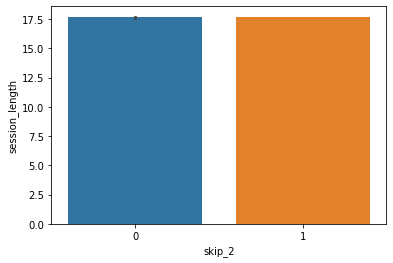

In [31]:
sns.barplot(x=df['skip_2'],y=sp_data['session_length'])

<AxesSubplot:xlabel='context_switch', ylabel='session_length'>

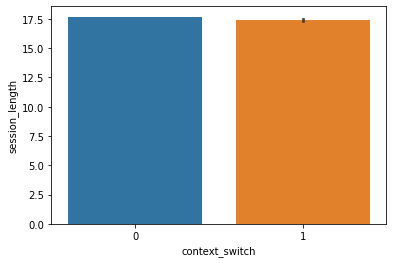

In [32]:
sns.barplot(x=sp_data['context_switch'],y=sp_data['session_length'])

<AxesSubplot:xlabel='skip_2', ylabel='hist_user_behavior_reason_start'>

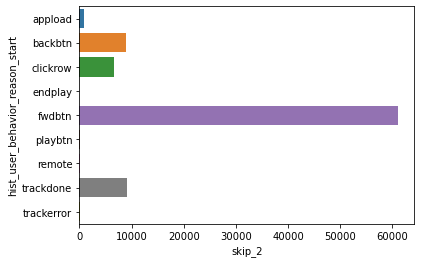

In [33]:
variable = sp_data.groupby('hist_user_behavior_reason_start')['skip_2'].sum()
sns.barplot(y=variable .keys() , x =variable)

<AxesSubplot:xlabel='skip_2', ylabel='hist_user_behavior_reason_end'>

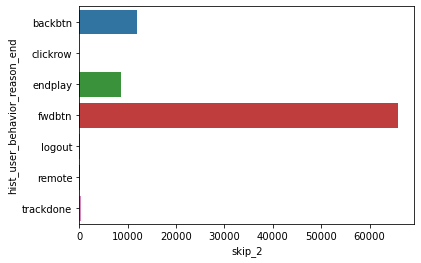

In [34]:
variable = sp_data.groupby('hist_user_behavior_reason_end')['skip_2'].sum()
sns.barplot(y=variable .keys() , x =variable)

In [35]:
#sns.barplot(x=df['skip_2'],y=df['shuffle'])

<AxesSubplot:xlabel='skip_2', ylabel='hour_of_day'>

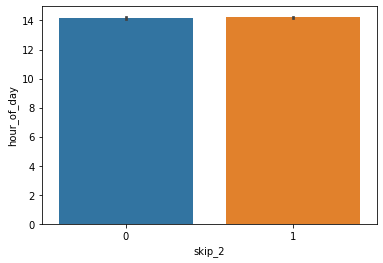

In [36]:
sns.barplot(x=df['skip_2'],y=sp_data['hour_of_day'])

<AxesSubplot:xlabel='skip_2', ylabel='premium'>

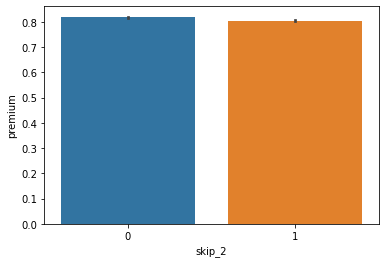

In [37]:
sns.barplot(x=df['skip_2'],y=df['premium'])

<AxesSubplot:xlabel='context_switch', ylabel='context_type'>

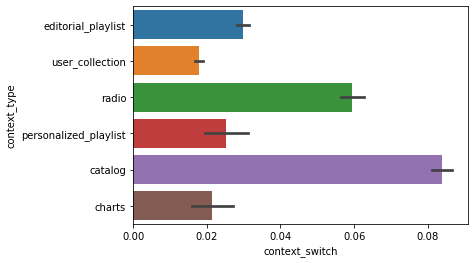

In [38]:
sns.barplot(x=sp_data['context_switch'],y=sp_data['context_type'])


In [39]:
sp_track.columns

Index(['track_id', 'duration', 'release_year', 'us_popularity_estimate',
       'acousticness', 'beat_strength', 'bounciness', 'danceability',
       'dyn_range_mean', 'energy', 'flatness', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mechanism', 'mode', 'organism', 'speechiness',
       'tempo', 'time_signature', 'valence', 'acoustic_vector_0',
       'acoustic_vector_1', 'acoustic_vector_2', 'acoustic_vector_3',
       'acoustic_vector_4', 'acoustic_vector_5', 'acoustic_vector_6',
       'acoustic_vector_7'],
      dtype='object')

# Track Features Visualization

<AxesSubplot:>

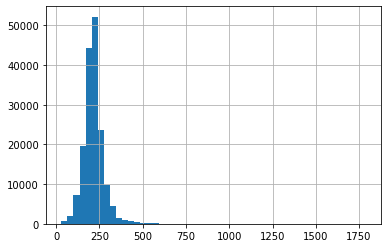

In [40]:
df.duration.hist(bins=50)

<AxesSubplot:>

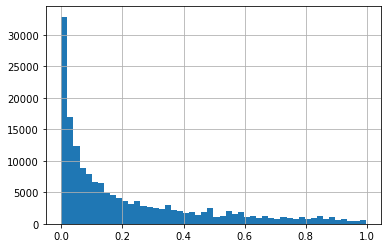

In [41]:
df.acousticness.hist(bins=50)

<AxesSubplot:>

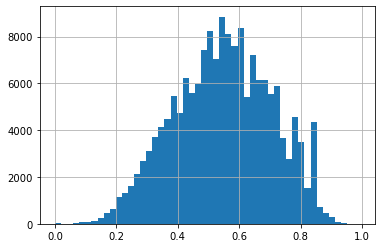

In [42]:
df.beat_strength.hist(bins=50)

<AxesSubplot:>

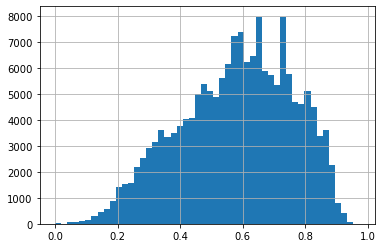

In [43]:
df.bounciness.hist(bins=50)

<AxesSubplot:>

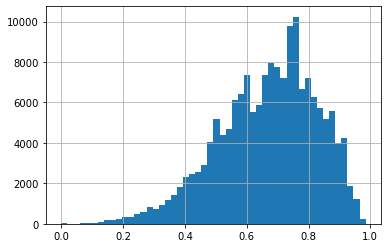

In [44]:
df.danceability.hist(bins=50)

<AxesSubplot:>

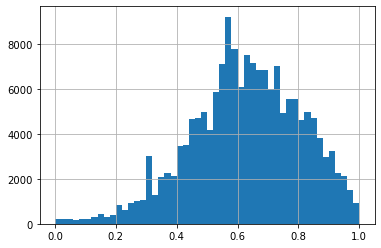

In [45]:
df.energy.hist(bins=50)

<AxesSubplot:>

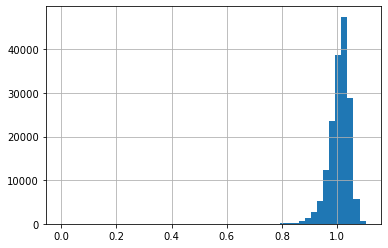

In [46]:
df.flatness.hist(bins=50)

<AxesSubplot:>

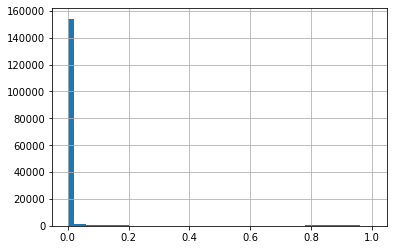

In [47]:
df.instrumentalness.hist(bins=50)

<AxesSubplot:>

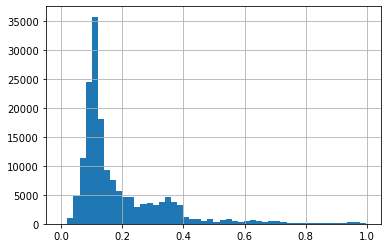

In [48]:
df.liveness.hist(bins=50)

<AxesSubplot:>

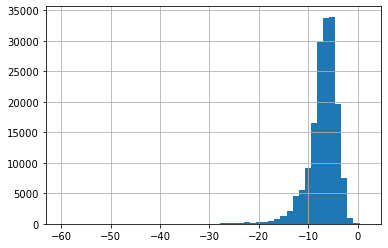

In [49]:
df.loudness.hist(bins=50)

<AxesSubplot:>

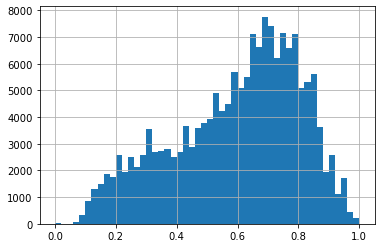

In [50]:
df.mechanism.hist(bins=50)

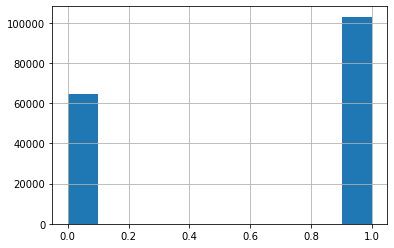

In [51]:
df['mode'].hist();

<AxesSubplot:>

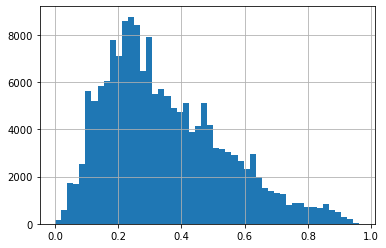

In [52]:
df.organism.hist(bins=50)

<AxesSubplot:>

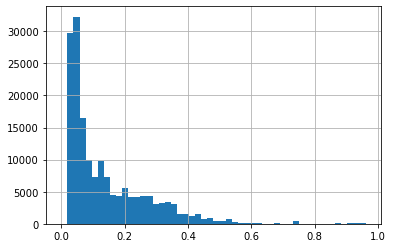

In [53]:
df.speechiness.hist(bins=50)

<AxesSubplot:>

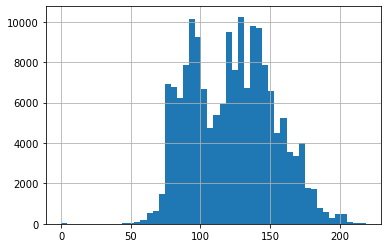

In [54]:
df.tempo.hist(bins=50)

<AxesSubplot:>

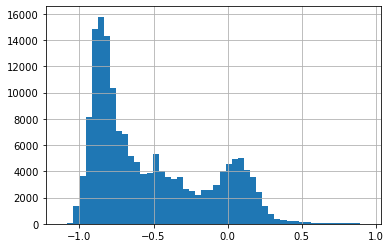

In [55]:
df.acoustic_vector_0.hist(bins=50)

<AxesSubplot:>

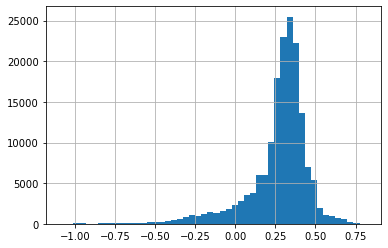

In [56]:
df.acoustic_vector_1.hist(bins=50)

<AxesSubplot:>

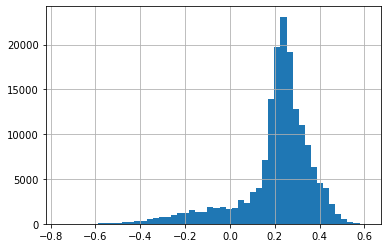

In [57]:
df.acoustic_vector_2.hist(bins=50)

<AxesSubplot:>

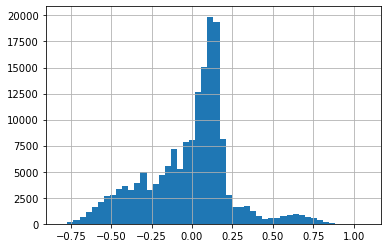

In [58]:
df.acoustic_vector_3.hist(bins=50)

<AxesSubplot:>

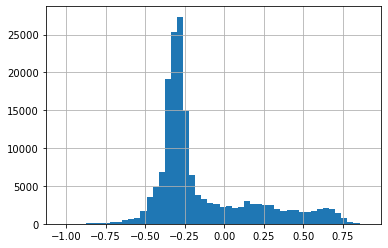

In [59]:
df.acoustic_vector_4.hist(bins=50)

<AxesSubplot:>

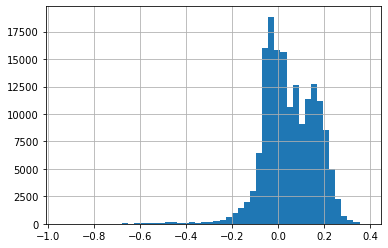

In [60]:
df.acoustic_vector_5.hist(bins=50)

<AxesSubplot:>

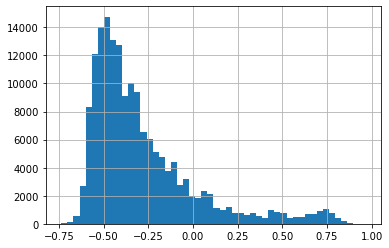

In [61]:
df.acoustic_vector_6.hist(bins=50)

<AxesSubplot:>

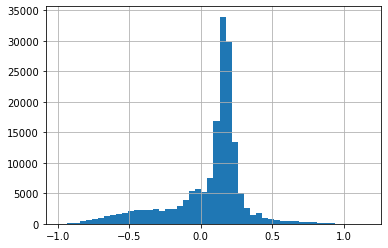

In [62]:
df.acoustic_vector_7.hist(bins=50)

# Correlation Heatmap

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
pd.set_option("display.max_columns",None)

In [65]:
df.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,context_type_catalog,context_type_charts,context_type_editorial_playlist,context_type_personalized_playlist,context_type_radio,context_type_user_collection,hist_user_behavior_reason_start_appload,hist_user_behavior_reason_start_backbtn,hist_user_behavior_reason_start_clickrow,hist_user_behavior_reason_start_endplay,hist_user_behavior_reason_start_fwdbtn,hist_user_behavior_reason_start_playbtn,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,1,0,0,0,0,0,0,1,16,2018-07-15,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0_00079a23-1600-486a-91bd-5208be0c745a,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,1,0,0,0,1,1,0,0,0,17,2018-07-15,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,0_012b0fb4-0cc3-429f-9a78-cc6e622153fb,6,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,1,0,0,1,1,0,0,0,21,2018-07-14,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0_013cc010-c476-4ad2-8972-73449e0b2ef4,9,13,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,1,0,1,0,0,0,0,0,18,2018-07-15,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0_01a5f0dc-9938-48c9-92f1-c7e51f34d290,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,1,0,0,0,1,1,0,0,1,19,2018-07-14,0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [66]:
sc = MinMaxScaler()

In [67]:
scaling_col = ["hist_user_behavior_n_seekfwd","hist_user_behavior_n_seekback","duration","acousticness","beat_strength","acousticness", "beat_strength","bounciness", "danceability","dyn_range_mean", "energy", 'flatness', "instrumentalness", "mode","key","liveness", "loudness", "mechanism", "organism", "speechiness","tempo", "time_signature", "valence","acoustic_vector_0","acoustic_vector_1","acoustic_vector_2","acoustic_vector_3","acoustic_vector_4","acoustic_vector_5","acoustic_vector_6","acoustic_vector_7"]

In [68]:
df1 = df.copy()

In [69]:
for i in scaling_col: 
    df1[i] = sc.fit_transform(df1[[i]])

In [70]:
df1.shape

(167880, 70)

In [71]:
df1.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,context_type_catalog,context_type_charts,context_type_editorial_playlist,context_type_personalized_playlist,context_type_radio,context_type_user_collection,hist_user_behavior_reason_start_appload,hist_user_behavior_reason_start_backbtn,hist_user_behavior_reason_start_clickrow,hist_user_behavior_reason_start_endplay,hist_user_behavior_reason_start_fwdbtn,hist_user_behavior_reason_start_playbtn,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,1,0,0,0,0,0.0,0.0,1,16,2018-07-15,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.085367,2018,99.968133,0.015915,0.442794,0.486798,0.663098,0.236839,0.553533,0.938174,0.003487,0.090909,0.681102,0.866778,0.546784,1.0,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0_00079a23-1600-486a-91bd-5208be0c745a,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,1,0,0,0,1,1,0.0,0.0,0,17,2018-07-15,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.085367,2018,99.968133,0.015915,0.442794,0.486798,0.663098,0.236839,0.553533,0.938174,0.003487,0.090909,0.681102,0.866778,0.546784,1.0,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,0_012b0fb4-0cc3-429f-9a78-cc6e622153fb,6,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,1,0,0,1,1,0.0,0.0,0,21,2018-07-14,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.085367,2018,99.968133,0.015915,0.442794,0.486798,0.663098,0.236839,0.553533,0.938174,0.003487,0.090909,0.681102,0.866778,0.546784,1.0,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0_013cc010-c476-4ad2-8972-73449e0b2ef4,9,13,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,1,0,1,0,0,0.0,0.0,0,18,2018-07-15,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.085367,2018,99.968133,0.015915,0.442794,0.486798,0.663098,0.236839,0.553533,0.938174,0.003487,0.090909,0.681102,0.866778,0.546784,1.0,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0_01a5f0dc-9938-48c9-92f1-c7e51f34d290,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,1,0,0,0,1,1,0.0,0.0,1,19,2018-07-14,0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.085367,2018,99.968133,0.015915,0.442794,0.486798,0.663098,0.236839,0.553533,0.938174,0.003487,0.090909,0.681102,0.866778,0.546784,1.0,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [72]:
df1.corr()

,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,context_type_catalog,context_type_charts,context_type_editorial_playlist,context_type_personalized_playlist,context_type_radio,context_type_user_collection,hist_user_behavior_reason_start_appload,hist_user_behavior_reason_start_backbtn,hist_user_behavior_reason_start_clickrow,hist_user_behavior_reason_start_endplay,hist_user_behavior_reason_start_fwdbtn,hist_user_behavior_reason_start_playbtn,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
session_position,1.000000,0.313508,0.055365,0.040010,0.001222,0.005463,-0.020918,0.194384,0.027115,0.023199,-0.035673,-0.023678,0.012484,-0.004032,0.023865,-0.004804,0.000361,-0.004715,-0.000785,-0.001171,-0.000398,0.000282,-0.002668,-0.000711,-0.001986,0.003824,0.003461,0.002167,-0.002581,-0.002795,-0.013140,0.000002,0.008056,0.002231,-0.003851,0.007374,-0.008291,0.001391,0.002641,0.007888,-0.002797,-0.008197,-0.001811,0.003820,-0.030505,0.008338,0.000155,-0.007394,0.029727,0.005824,-0.123902,0.002729,-0.103459,-0.012152,0.094139,-0.030456,-0.013439,-0.003044,-0.000093,-0.016967,-0.005630,-0.057114,0.042403,0.024684,-0.017311,-0.002379
session_length,0.313508,1.000000,0.090904,0.078193,0.060131,-0.059734,-0.012779,0.053717,-0.007410,-0.020236,-0.008572,-0.016171,0.032005,-0.013001,0.075817,-0.010037,0.010267,0.003600,-0.002614,0.011249,0.013911,0.012469,0.011267,-0.008518,0.011915,-0.002057,0.004523,-0.000597,-0.005544,0.000219,-0.008620,-0.002238,0.014414,0.005955,0.000052,-0.003812,-0.026988,0.001407,0.007729,0.022729,-0.009516,-0.022487,-0.015920,0.007080,-0.047158,0.020851,-0.001528,-0.019560,0.033864,0.018899,-0.035697,-0.012378,-0.019048,-0.001601,0.068591,-0.005332,-0.001997,-0.045046,0.003498,-0.011376,-0.015436,-0.011282,0.078087,-0.043507,-0.009830,-0.062653
skip_1,0.055365,0.090904,1.000000,0.824751,0.628597,-0.602966,-0.094305,0.191440,-0.129213,-0.163313,-0.043591,-0.051059,0.052393,0.011958,-0.027076,0.017686,-0.001480,0.005001,-0.021315,0.006606,0.011013,0.009693,0.010775,0.004704,0.002431,-0.017852,0.003254,0.002677,0.009349,-0.001300,-0.011358,-0.010563,0.021412,0.005366,0.009910,-0.005272,-0.034232,0.017919,0.013202,0.011871,-0.020942,-0.014580,-0.029346,0.013716,-0.084111,0.007368,-0.019998,-0.024352,0.021333,0.078987,-0.037742,0.129333,-0.125183,-0.004896,0.507920,-0.009665,-0.009041,-0.522620,0.000114,0.231338,0.006340,-0.082649,0.512890,-0.036161,-0.017419,-0.615334
skip_2,0.040010,0.078193,0.824751,1.000000,0.762141,-0.731088,-0.073632,0.105180,-0.033340,-0.073393,0.003953,-0.036935,0.048836,0.009774,-0.016049,0.019314,-0.007481,-0.004016,-0.018282,0.001073,0.006000,0.004638,0.007270,0.006438,-0.001484,-0.012767,0.002002,0.004030,0.006790,-0.005497,-0.011581,-0.005904,0.019807,0.005414,0.007547,-0.000653,-0.025665,0.011355,0.011561,0.013393,-0.015201,-0.015895,-0.017240,0.009701,-0.065949,0.009218,-0.009359,-0.017446,0.027753,0.047917,-0.012526,0.097735,-0.094677,-0.002560,0.472379,-0.002026,-0.004331,-0.493171,-0.001314,0.223093,0.006670,0.037386,0.568416,-0.026427,-0.005111,-0.743031
skip_3,0.001222,0.060131,0

In [73]:
#df1=df1.drop(["skip_1","skip_3","not_skipped"],axis='columns')

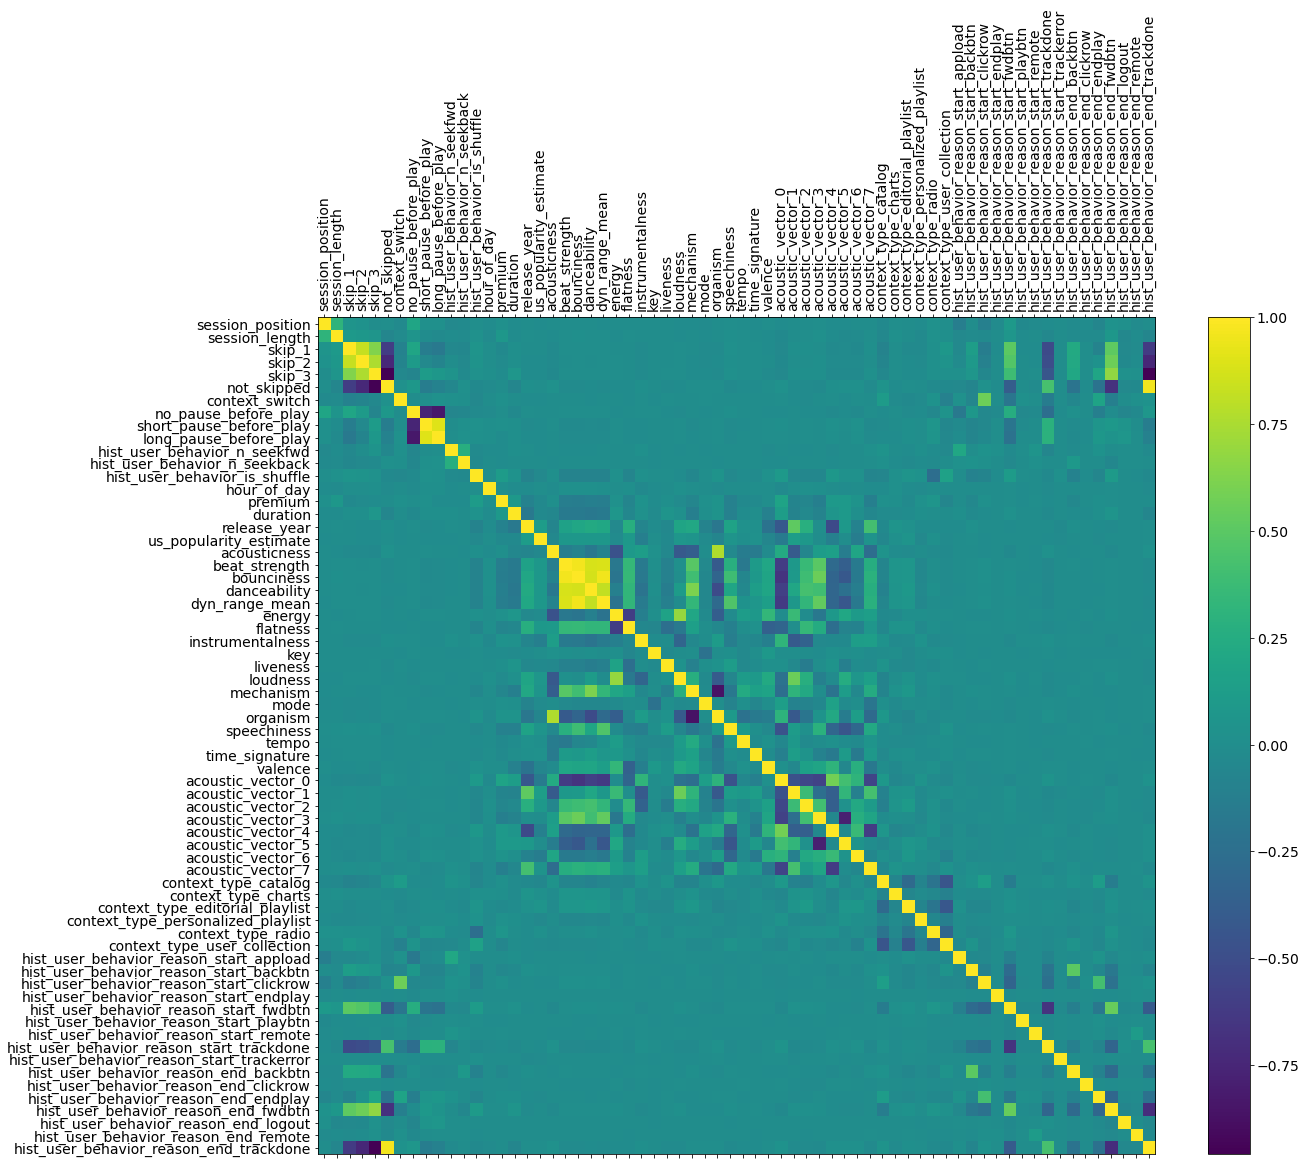

In [74]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df1.corr(), fignum=f.number)
plt.xticks(range(df1.select_dtypes(['number']).shape[1]), df1.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df1.select_dtypes(['number']).shape[1]), df1.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [75]:
df1=df1.drop(["beat_strength","dyn_range_mean","skip_1","skip_3","not_skipped"],axis='columns')

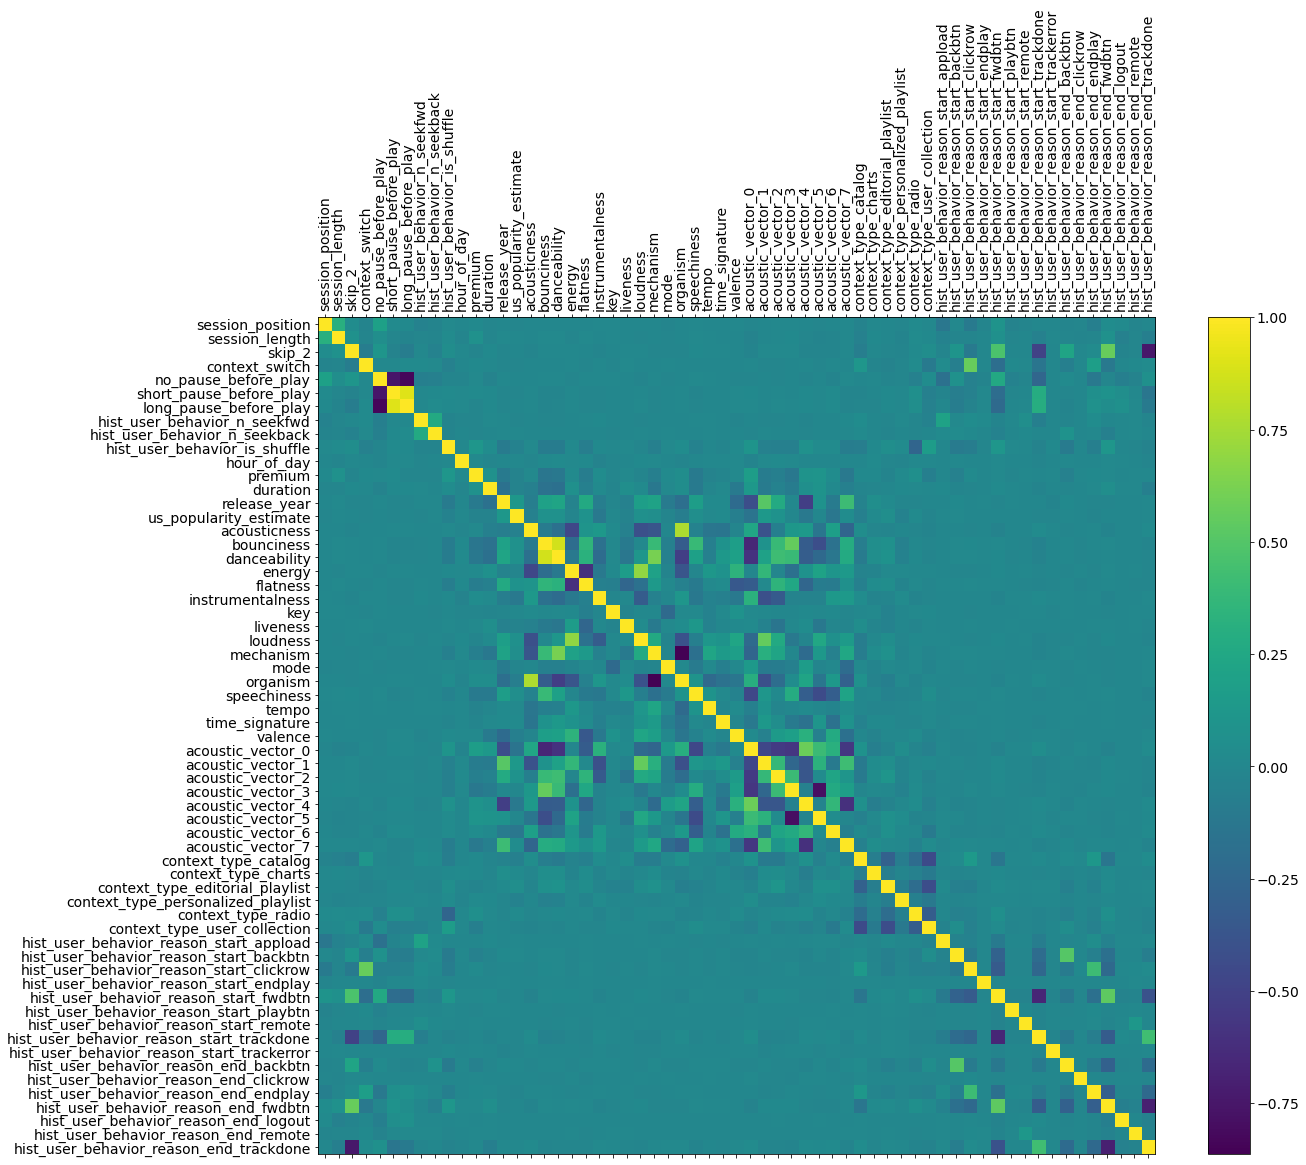

In [76]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df1.corr(), fignum=f.number)
plt.xticks(range(df1.select_dtypes(['number']).shape[1]), df1.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df1.select_dtypes(['number']).shape[1]), df1.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

# Principle Component Analysis

In [77]:
df1.shape

(167880, 65)

In [78]:
df1.head()

,session_id,session_position,session_length,track_id_clean,skip_2,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,track_id,duration,release_year,us_popularity_estimate,acousticness,bounciness,danceability,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,context_type_catalog,context_type_charts,context_type_editorial_playlist,context_type_personalized_playlist,context_type_radio,context_type_user_collection,hist_user_behavior_reason_start_appload,hist_user_behavior_reason_start_backbtn,hist_user_behavior_reason_start_clickrow,hist_user_behavior_reason_start_endplay,hist_user_behavior_reason_start_fwdbtn,hist_user_behavior_reason_start_playbtn,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,0,0,0.0,0.0,1,16,2018-07-15,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.085367,2018,99.968133,0.015915,0.486798,0.663098,0.553533,0.938174,0.003487,0.090909,0.681102,0.866778,0.546784,1.0,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0_00079a23-1600-486a-91bd-5208be0c745a,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,1,1,0.0,0.0,0,17,2018-07-15,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.085367,2018,99.968133,0.015915,0.486798,0.663098,0.553533,0.938174,0.003487,0.090909,0.681102,0.866778,0.546784,1.0,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,0_012b0fb4-0cc3-429f-9a78-cc6e622153fb,6,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,1,1,0.0,0.0,0,21,2018-07-14,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.085367,2018,99.968133,0.015915,0.486798,0.663098,0.553533,0.938174,0.003487,0.090909,0.681102,0.866778,0.546784,1.0,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0_013cc010-c476-4ad2-8972-73449e0b2ef4,9,13,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,1,0,0,0.0,0.0,0,18,2018-07-15,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.085367,2018,99.968133,0.015915,0.486798,0.663098,0.553533,0.938174,0.003487,0.090909,0.681102,0.866778,0.546784,1.0,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0_01a5f0dc-9938-48c9-92f1-c7e51f34d290,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,1,1,0.0,0.0,1,19,2018-07-14,0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.085367,2018,99.968133,0.015915,0.486798,0.663098,0.553533,0.938174,0.003487,0.090909,0.681102,0.866778,0.546784,1.0,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [79]:
df1.drop(['session_id', 'track_id_clean','skip_2', 'track_id','date','instrumentalness'],axis = 'columns',inplace = True)

In [80]:
from sklearn.decomposition import PCA

In [81]:
df1.dtypes

session_position                                int64
session_length                                  int64
context_switch                                  int64
no_pause_before_play                            int64
short_pause_before_play                         int64
long_pause_before_play                          int64
hist_user_behavior_n_seekfwd                  float64
hist_user_behavior_n_seekback                 float64
hist_user_behavior_is_shuffle                   int64
hour_of_day                                     int64
premium                                         int64
duration                                      float64
release_year                                    int64
us_popularity_estimate                        float64
acousticness                                  float64
bounciness                                    float64
danceability                                  float64
energy                                        float64
flatness                    

In [82]:
pca=PCA(n_components=30)

In [83]:
pca.fit(df1)

PCA(n_components=30)

In [84]:
x_pca=pca.transform(df1)

In [85]:
df1.shape

(167880, 59)

In [86]:
x_pca.shape

(167880, 30)

# LGBT

In [87]:
from datetime import datetime

In [88]:
from sklearn import metrics

In [89]:
from sklearn.metrics import roc_auc_score

In [90]:
from sklearn.metrics import confusion_matrix

In [91]:
y = df['skip_2'].values

split data into train and test

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=0)

training the dataset with lightgbm 

In [94]:
!pip install lightgbm

In [95]:
import lightgbm as lgb

In [96]:
d_train = lgb.Dataset(X_train, label=y_train)

In [97]:
lgbm_params = {'learning_rate':0.05, 'boosting_type':'gbdt',
                       'objective':'binary',
                       'metric':['auc', 'binary_logloss'],
                       'num_leaves':100,
                       'max_depth':10}

In [98]:
start=datetime.now()
clf = lgb.train(lgbm_params, d_train, 50)
stop=datetime.now()
execution_time_lgbm = stop-start
print("LGBM execution time is:", execution_time_lgbm)

[LightGBM] [Info] Number of positive: 69525, number of negative: 64779
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030317 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 134304, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.517669 -> initscore=0.070705
[LightGBM] [Info] Start training from score 0.070705
LGBM execution time is: 0:00:01.509961


model predictions

In [99]:
y_pred_lgbm = clf.predict(X_test)

In [100]:
for i in range(0, X_test.shape[0]):
    if y_pred_lgbm[i]>=.5:
        y_pred_lgbm[i]=1
    else:
        y_pred_lgbm[i]=0
metrics.accuracy_score(y_pred_lgbm, y_test) 

0.8708899213724088

confusion matrix

In [101]:
cm = confusion_matrix(y_pred_lgbm, y_test)

In [102]:
cm

array([[13522,  1580],
       [ 2755, 15719]], dtype=int64)

<AxesSubplot:>

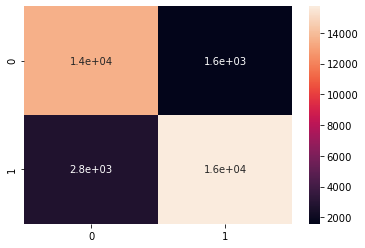

In [103]:
sns.heatmap(cm, annot=True)

# SVM

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=1)

In [105]:
from sklearn.svm import SVC
from sklearn import metrics

In [106]:
svc=SVC() #Default hyperparameters

In [108]:
svc.fit(X_train,y_train)

SVC()

In [109]:
y_pred=svc.predict(X_test)

In [110]:
print('Accuracy Score:')

Accuracy Score:


In [111]:
print(metrics.accuracy_score(y_test,y_pred))

0.8727364784369788
